In [13]:
import kornia as K
import torch.nn as nn
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms.functional as tvf

## Copying Folders

In [3]:
# get all pictures from data folder
import glob

images = glob.glob('./data/**/*.png', recursive=True)

In [138]:
# copy files
import shutil
for i in range(5):
    src_path = f"./data/VO_adv_project_train_dataset_8_frames/{i}"
    dst_path = f"./data/VO_adv_project_train_dataset_8_frames/{i + 10}"
    shutil.copytree(src_path, dst_path)
print('Copied')

Copied


In [139]:
# change name of files
import os
for i in range(10,15):
    directories = glob.glob(f'./data/VO_adv_project_train_dataset_8_frames/{i}/*')
    for directory in directories:
        new_name = f'{"/".join(directory.split("/")[:-1]) + "/" + f"00{i}" + directory.split("/")[-1][4:]}'
        os.rename(directory, new_name)
    images = glob.glob(f'./data/VO_adv_project_train_dataset_8_frames/{i}/**/*.png', recursive=True)
    for image in images:
        new_name = f'{"/".join(image.split("/")[:-1]) + "/" + image.split("/")[-1][:5] + f"{i}" + image.split("/")[-1][7:]}'
        os.rename(image, new_name)
    numpys = glob.glob(f'./data/VO_adv_project_train_dataset_8_frames/{i}/**/*.npy', recursive=True)
    for nump in numpys:
        new_name = f'{"/".join(nump.split("/")[:-1]) + "/" + nump.split("/")[-1][:13] + f"{i}" + nump.split("/")[-1][15:]}'
        os.rename(nump, new_name)

## Image Transformation

In [198]:
import torchvision.transforms.functional as TF

class IlluminationTransform:
    """Transform image by the given values"""

    def __init__(self, brightness, contrast, gamma, hue, saturation=1):
        self.brightness = brightness
        self.contrast = contrast
        self.gamma = gamma
        self.hue = hue
        self.saturation = saturation

    def __call__(self, x):
        x = TF.to_pil_image(x)
        x = TF.adjust_brightness(x, self.brightness)
        x = TF.adjust_contrast(x, self.contrast)
        x = TF.adjust_gamma(x, self.gamma)
        x = TF.adjust_hue(x, self.hue)
        x = TF.adjust_saturation(x, self.saturation)
        # x = TF.to_tensor(x)
        return x

In [292]:
illumination_transform_1 = IlluminationTransform(brightness=1.2, contrast=1.1, gamma=0.6, hue=-0.06)
illumination_transform_2 = IlluminationTransform(brightness=1, contrast=0.7, gamma=1.8, hue=0.08, saturation=0.4)

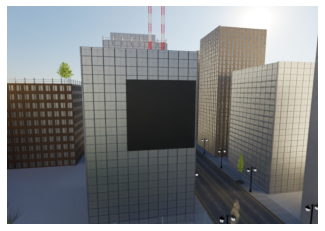

In [296]:
images = glob.glob('./data/*/5/**/*.png', recursive=True)
img_bgr = cv2.imread(images[6])  # HxWxC / np.uint8
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
illumination_transform_1(img_rgb)
plt.imshow(img_rgb); plt.axis('off');

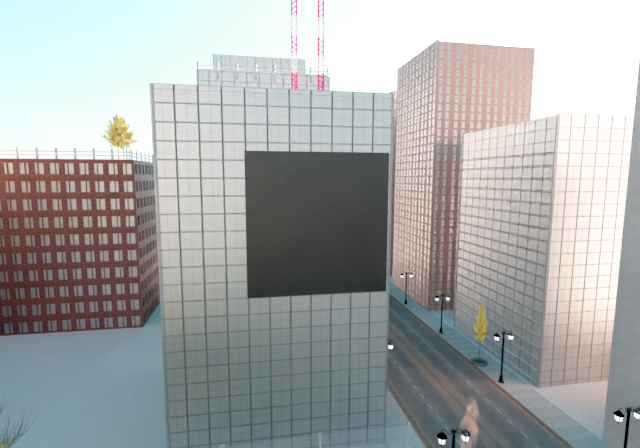

In [293]:
illumination_transform_1(img_rgb)

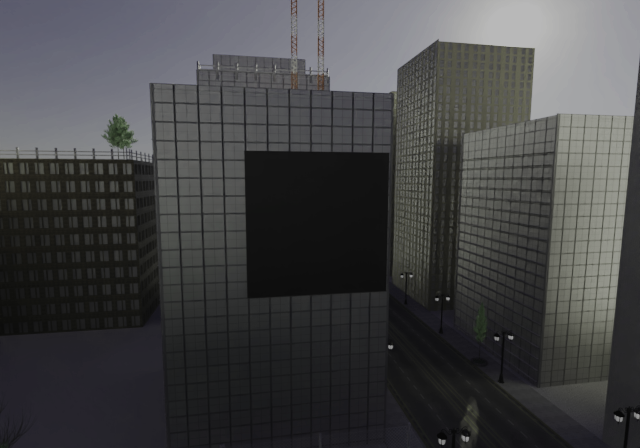

In [291]:
illumination_transform_2(img_rgb)

In [303]:
# read image, transform it and save it
for i in range(5, 10):
    images = glob.glob(f'./data/*/{i}/**/*.png', recursive=True)
    for image in images:
        img_bgr = cv2.imread(image)  # HxWxC / np.uint8
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        transformed_image = illumination_transform_1(img_rgb)
        transformed_image.save(image)

In [304]:
# read image, transform it and save it
for i in range(10, 15):
    images = glob.glob(f'./data/*/{i}/**/*.png', recursive=True)
    for image in images:
        img_bgr = cv2.imread(image)  # HxWxC / np.uint8
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        transformed_image = illumination_transform_2(img_rgb)
        transformed_image.save(image)

## Copy Patches from Original Image

In [315]:
folder_path = f'./data/VO_adv_project_train_dataset_8_frames/0/00000_seed_00001/'
mask_coords_path = folder_path + 'mask_coords.csv'
assert os.path.isfile(mask_coords_path)
mask_coords = np.genfromtxt(mask_coords_path, delimiter=',')[:8]
# we want point order topLeft -> clockwise, but have bl->br->tl->tr, so:
points = [np.array([[pts[4], pts[5], pts[6], pts[7]], [pts[2], pts[3], pts[0], pts[1]]], dtype=np.int32)
          for pts in mask_coords]

In [314]:
points

[array([[245, 150, 390, 152],
        [387, 290, 249, 297]], dtype=int32),
 array([[245, 151, 390, 153],
        [387, 291, 248, 299]], dtype=int32),
 array([[244, 152, 390, 154],
        [387, 293, 247, 300]], dtype=int32),
 array([[244, 152, 390, 154],
        [387, 294, 247, 302]], dtype=int32),
 array([[243, 153, 391, 155],
        [388, 296, 246, 303]], dtype=int32),
 array([[242, 153, 391, 156],
        [388, 298, 245, 305]], dtype=int32),
 array([[242, 154, 391, 156],
        [388, 299, 244, 306]], dtype=int32),
 array([[241, 155, 391, 157],
        [388, 301, 244, 308]], dtype=int32)]

In [318]:
img_bgr = cv2.imread(folder_path + 'I0_00000_0000.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
tensor_image = TF.to_tensor(img_rgb)
# plt.imshow(img_rgb); plt.axis('off');

In [321]:
tensor_image[:, ]

torch.Size([3, 448, 640])